# Mapear conjuntos de datos globales: formato JSON

Es este apartado descargaremos un conjunto de datos que representa todos los terremotos producidos en España en el 2021. Desṕúes crearemos un mapa que los muestre y lo importante que fue cada uno. El archivo esta descargado de http://www.ign.es/web/ign/portal/sis-catalogo-terremotos en formato geojson.

In [4]:
import json

# Explora la estructura de los datos
nombre_archivo = 'teremotos21.geojson'
with open(nombre_archivo) as f:
    datos = json.load(f) #(1)
    
datos_normalizados = 'terremotos.json'
with open(datos_normalizados, 'w') as f: #(2)
    json.dump(datos, f, indent=4) # (3)
    

Los archivos en formato json (muy parecidos a un diccionarios con datos en python) están más pensados para que sean leidos por máquinas que por humanos, porque suelen ser densos y dificiles de leer. No obstante el módulo JSON ofrece varias herramientas para trabajar con ellos. Vamos a empezar por cargar los datos y mostrarlos en un formato más fácil de leer.
Lo primero importamos el módulo Json para cargar los datos (terremoto.geojson) en bruto (1).
En (2) creamos un archivo para escribir esos mismos datos en un formato más legible. La función json.dump() toma un objeto de datos json y un objeto archivo y escribe los datos en el archivo.
El argumento indent (3) dice a dump() que formatee los datos con sangrados que se ajusten a la estructura.
El archivo resultante 'terremotos.json' es más facil de leer y tiene la siguiente estructura.       
 

En la primera parte del archivo nos indica un poco la estructura general del archivo. Este tipo de archivos geojson tienen una estructura útil para datos basados en ubicación. La información se almacena en una lista asociada con la clave "features". Como este archivo contiene datos de terremotos , los mismo están en forma de lista donde cada elemento se corresponde con un solo terremoto. También permite a los geologos guardar tanta información como quieran en un diccionario sobre cada terremoto y luego meter todos esos diccionarios en una gran lista.

Si nos fijamos en el diccionario que representa un terremoto, vemos que la clave **properties** contiene mucha información sobre cada terremoto, nos interesan los valores magnitud y localización. La clave **"geometry"** nos ayuda a entender donde se produjeron los terremotos ya que nos proporciona las coordenadas del suceso de esta forma: longitud y latitud asociadas a la clave **"coordinates"**


## Hacer una lista con todos los terremotos

Lo primero vamos a ahcer una lista que contenga toda la información sobre cada uno de los terremotos producidos.

In [7]:
import json

# Explora la estructura de los datos
nombre_archivo = 'terremotos.json'
with open(nombre_archivo) as f:
    datos = json.load(f)
    
terremotos = datos['features']
print(len(terremotos))

21314


Cogemos los datos asociados con la clave **'features'** y los guardamos en terremotos. Sabemos que esta variable contiene los datos de 21314 terremotos (en España en el año 2021). Con este código tan simple hemos reducido las más de 468.000 lineas del json original a tener todos los datos de los terremotos en una variable de Python.

## Extraer magnitudes.


Usando la lista que contiene datos sobre cada terremoto podemos pasar en bucle por ella para extraer la información que queramos. Empezaremos por sacar la magnitud de cada terremoto:

In [8]:
mags = []
for terremoto in terremotos:
    mag = terremoto['properties']['magnitud']
    mags.append(mag)
    
print(mags[-50:]) 

[1.5, 2.1, 2.8, 1.7, 2.8, 2.4, 1.7, 1.9, 2.0, 1.8, 1.5, 1.6, 1.6, 3.1, 2.2, 2.1, 1.7, 1.6, 2.9, 1.9, 2.0, 1.7, 2.1, 3.2, 2.4, 2.1, 1.7, 2.7, 2.2, 2.1, 2.2, 2.0, 3.2, 2.2, 1.8, 1.6, 1.7, 1.0, 1.0, 2.0, 2.2, 2.4, 1.1, 1.9, 1.9, 2.0, 2.2, 1.9, 2.2, 1.8]


Hacemos una lista vacia para guardar las magnitudes y luego pasamos en bucle por el diccionario terremotos. Dentro de este bucle, cada terremoto está representado por el diccionario terremoto. La magnitud de cada uno se guarda ne la sección **'properties'** de este diccionario bajo la clave mag. Almacenamos cada magnitud en la variable  mag y la adjuntamos a la lista mags. Imprimimos las últimas 50 magnitudes para ver si estamos viendo los datos correctos.

## Extraer los datos de ubicación.

Los datos de ubicación se guardan en la clave **"geometry"**. Dentro del diccionario de geometria, hay una clave **"coordinates"** y los 2 primeros valores de esa lista son la longitud y la latitud. Reformulemos el código para extraer esos datos.

In [9]:
mags, lons, lats = [], [], []
for terremoto in terremotos:
    mag = terremoto['properties']['magnitud']
    lon = terremoto['geometry']['coordinates'][0]
    lat = terremoto['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    
print(mags[-5:])
print(lons[-5:])
print(lats[-5:])


[2.0, 2.2, 1.9, 2.2, 1.8]
[-17.842, -3.5196, -17.8916, -17.8289, -17.8435]
[28.5539, 35.5255, 28.6031, 28.5568, 28.5531]


## Crear un mapa del mundo


In [19]:
from plotly.graph_objs import Scattergeo, Layout # (1)
from plotly import offline

# Mapea los terremotos
# La forma más facil de especificar los datos sería:
# data = [Scattergeo(lon=lons, lat=lats)] pero vamos a verlo de otra forma:
data = [{
    'type': 'scattergeo',
    'lon': lons,
    'lat': lats,
    }]
my_layout = Layout(title='Terremotos en la Peninsula Iberica')

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='terremotos.html')

'terremotos.html'

Importamos el tipo de gráfico scattergeo y la clase Layout y luego el módulo offline para realizar el mapa. Un tipo de gráfico Scattergeo permite superponer un trazado de dispersión de datos geograficos sobre un mapa. Es el uso más sencillo de este tipo de gráficos ya que solo necesitamos proporcionale una lista de longitudes y otra de latitudes.
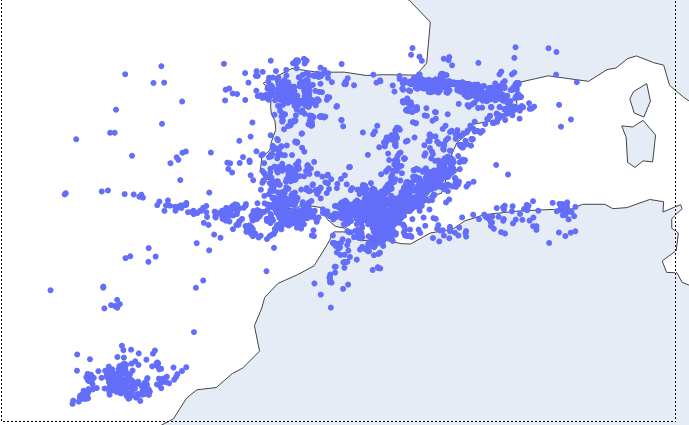

In [ ]:
Hay que ampliar un poco el mapa ya que si no parece que los terremotos ocupan toda Europa cuando no es asi.